In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import kabuki
%matplotlib inline
import hddm
print(hddm.__version__)

# For later convergence check
import multiprocessing as mp

0.8.0


## Two condition HDDM (z : trial_type)
#### Load data and check data head
##### Use anxious.csv

In [2]:
# Load data from csv file into a NumPy structured array
dataAnx = hddm.load_csv('./rt_dataframes/anxious.csv')
dataAnx.head(10)
#check number of rows of data
#data.shape

,subjID,rt,win,trial_type,gain,loss,cert,gamble
0,ff1d7a9a28686c2b,2217.0,1.0,101,16.0,-5.0,0.0,1.0
1,ff1d7a9a28686c2b,1424.0,0.0,101,18.0,-6.0,0.0,1.0
2,ff1d7a9a28686c2b,1805.0,1.0,101,10.0,-5.0,0.0,1.0
3,ff1d7a9a28686c2b,1477.0,1.0,102,14.0,0.0,3.0,1.0
4,ff1d7a9a28686c2b,1257.0,1.0,102,12.0,0.0,4.0,1.0
5,ff1d7a9a28686c2b,1564.0,1.0,101,11.0,-5.0,0.0,1.0
6,ff1d7a9a28686c2b,1421.0,0.0,101,14.0,-4.0,0.0,1.0
7,ff1d7a9a28686c2b,1492.0,0.0,102,14.0,0.0,3.0,1.0
8,ff1d7a9a28686c2b,1196.0,0.0,102,20.0,0.0,7.0,0.0
9,ff1d7a9a28686c2b,1572.0,0.0,101,12.0,-5.0,0.0,1.0


## Prep the data
#### Changed the columns name allow hddm to pick up

In [3]:
dataAnx = dataAnx.rename(columns={'subjID'
: 
'subj_idx',
'gamble':
'response'})
dataAnx['rt'] = dataAnx['rt']/1000
dataAnx.head(10)

,subj_idx,rt,win,trial_type,gain,loss,cert,response
0,ff1d7a9a28686c2b,2.217,1.0,101,16.0,-5.0,0.0,1.0
1,ff1d7a9a28686c2b,1.424,0.0,101,18.0,-6.0,0.0,1.0
2,ff1d7a9a28686c2b,1.805,1.0,101,10.0,-5.0,0.0,1.0
3,ff1d7a9a28686c2b,1.477,1.0,102,14.0,0.0,3.0,1.0
4,ff1d7a9a28686c2b,1.257,1.0,102,12.0,0.0,4.0,1.0
5,ff1d7a9a28686c2b,1.564,1.0,101,11.0,-5.0,0.0,1.0
6,ff1d7a9a28686c2b,1.421,0.0,101,14.0,-4.0,0.0,1.0
7,ff1d7a9a28686c2b,1.492,0.0,102,14.0,0.0,3.0,1.0
8,ff1d7a9a28686c2b,1.196,0.0,102,20.0,0.0,7.0,0.0
9,ff1d7a9a28686c2b,1.572,0.0,101,12.0,-5.0,0.0,1.0


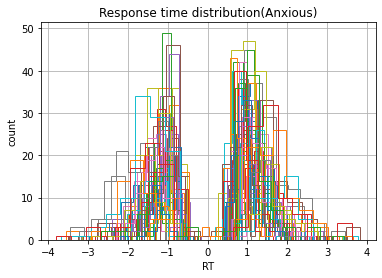

In [4]:
#flip the error RTs to be negative
dataAnx = hddm.utils.flip_errors(dataAnx)
#plt the RTs grouped by participants
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='Response time distribution(Anxious)')
for i, subj_data in dataAnx.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('./fitting_results/HDDM/HDDM2C(allparameter)/rt_distribution(anx).png')

## Fitting the hierarchical model for one condition with no subject effects for Anxious participants

In [5]:
m = hddm.HDDM(dataAnx,depends_on={'z': 'trial_type'}, include=('v', 'a', 't', 'z', 'sv', 'st', 'sz'))

m.find_starting_values()
m.sample(3000, burn=1000, dbname='./fitting_results/HDDM/HDDM2C(allparameter)/traces(2CAnx_z)', db='pickle')
m.save('./fitting_results/HDDM/HDDM2C(allparameter)/model(2CAnx_z)')

/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 [-----------------100%-----------------] 3001 of 3000 complete in 32454.3 sec

Plotting a
Plotting a_std
Plotting v
Plotting v_std
Plotting t
Plotting t_std
Plotting sv
Plotting sz
Plotting st
Plotting z(101)
Plotting z(102)
Plotting z_std


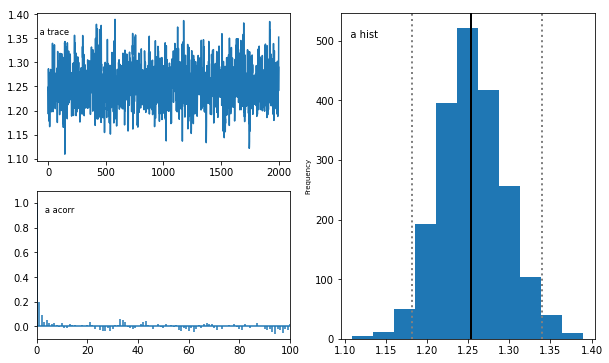

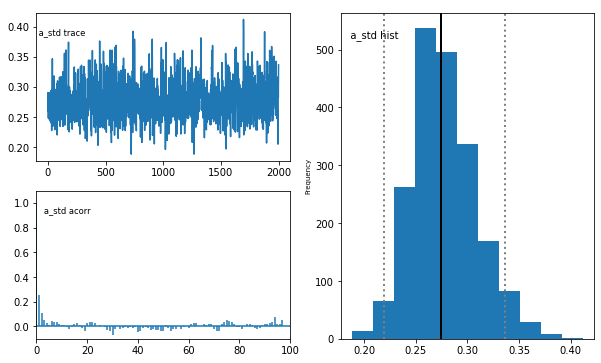

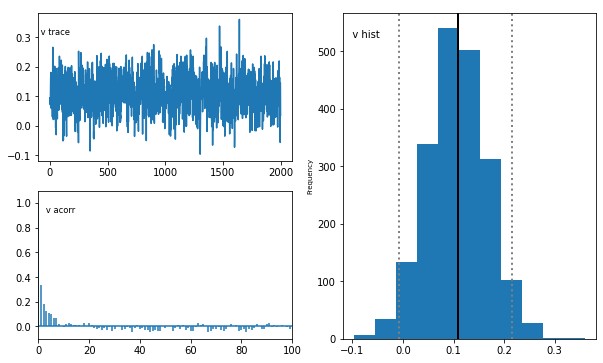

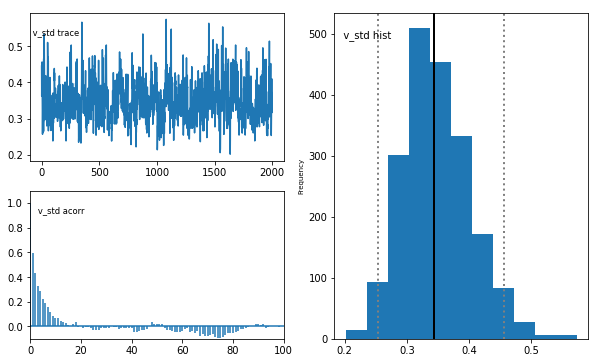

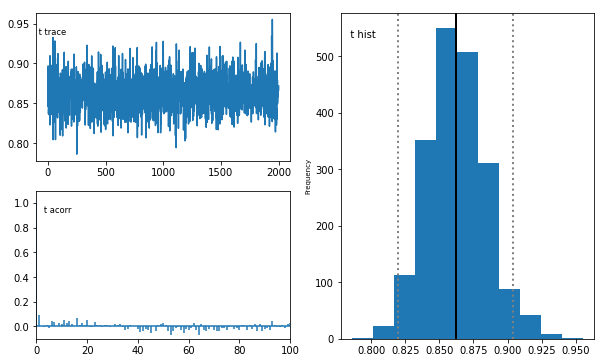

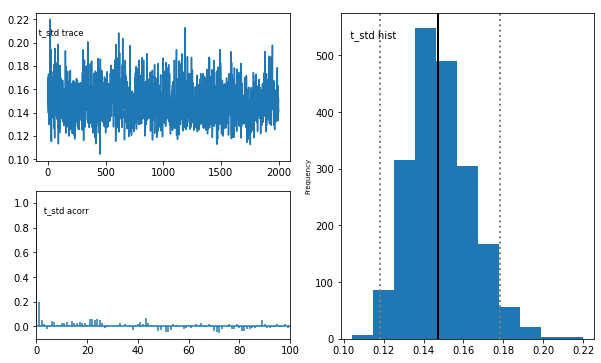

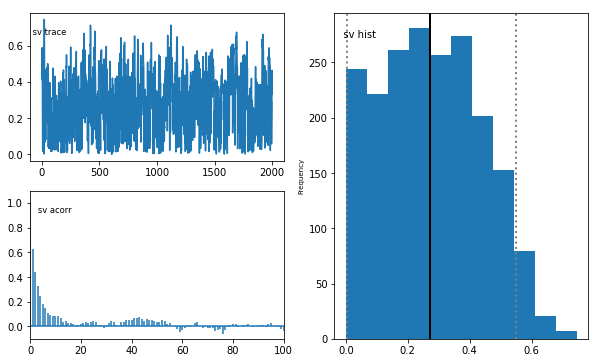

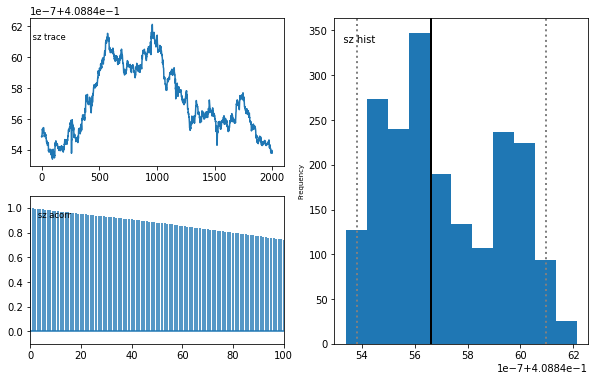

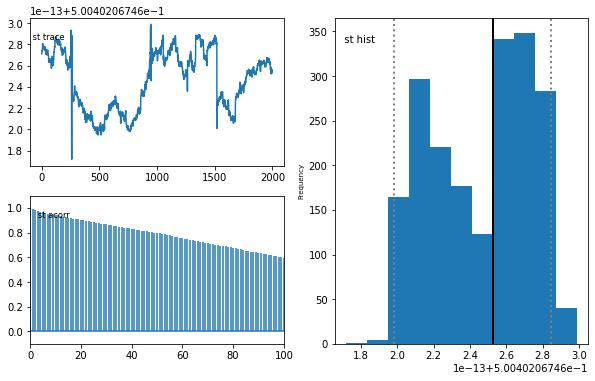

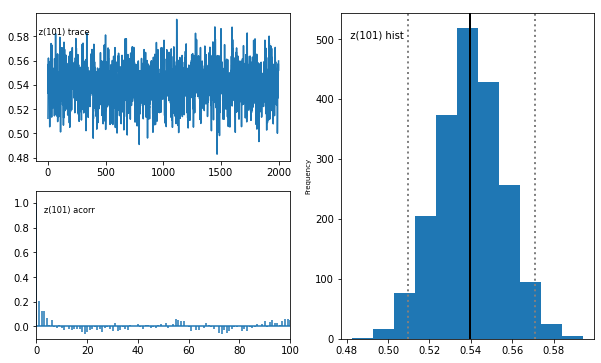

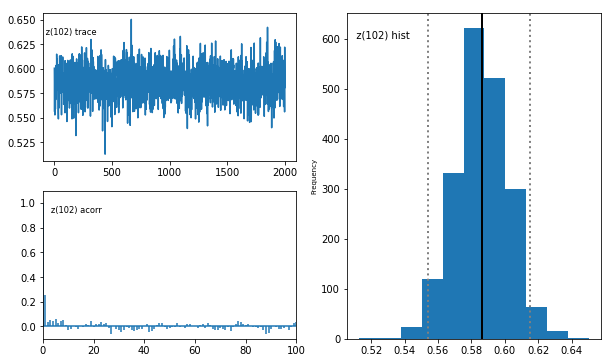

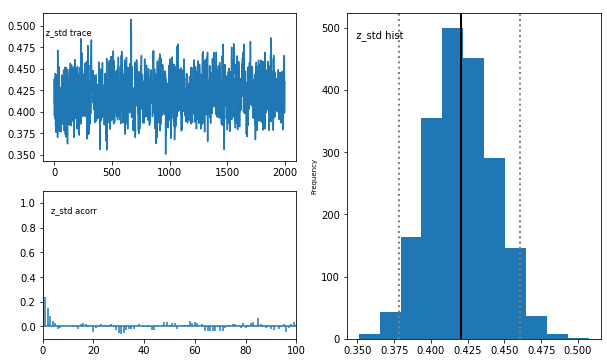

In [6]:
# plot posteriors
m.plot_posteriors(['v', 'a', 't', 'z', 'sv', 'st', 'sz', 'v_std', 'a_std','t_std','z_std','st_std','sz_std'])

In [7]:
stats2Cz = m.gen_stats()
stats2Cz.to_csv('./fitting_results/HDDM/HDDM2C(allparameter)/HDDM2CAnx_z.csv', sep=',')
stats2Cz[stats2Cz.index.isin(['v', 'a', 't', 'z', 'sv', 'st', 'sz', 'v_std', 'a_std',
't_std','z_std','st_std','sz_std'])]

,mean,std,2.5q,25q,50q,75q,97.5q,mc err
a,1.25525,0.0402629,1.17953,1.22857,1.25308,1.28151,1.3393,0.0012427
a_std,0.277808,0.0308469,0.225444,0.256005,0.27423,0.29664,0.344763,0.00102807
v,0.107409,0.0587206,-0.006934,0.0683725,0.107856,0.147933,0.21926,0.00211709
v_std,0.348335,0.0539923,0.256814,0.311264,0.343258,0.382355,0.463865,0.002788
t,0.86274,0.0215397,0.822689,0.848056,0.862172,0.876139,0.909561,0.000567758
t_std,0.148807,0.0158322,0.121678,0.137666,0.1473,0.158585,0.183257,0.000450947
sv,0.276073,0.161837,0.0153773,0.144404,0.270251,0.395926,0.590609,0.00782569
sz,0.408846,2.18871e-07,0.408845,0.408846,0.408846,0.408846,0.408846,2.17699e-08
st,0.500402,2.75627e-14,0.500402,0.500402,0.500402,0.500402,0.500402,2.71359e-15
z_std,0.420614,0.0218438,0.379397,0.405363,0.420313,0.435398,0.463291,0.000707351


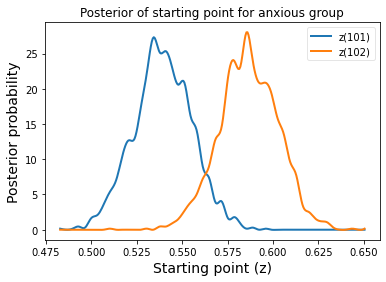

In [8]:
z_101, z_102 = m.nodes_db.node[['z(101)', 'z(102)']]
z_101_trace, z_102_trace = m.nodes_db.node[['z(101)', 'z(102)']]
hddm.analyze.plot_posterior_nodes([z_101, z_102])
plt.xlabel('Starting point (z)', fontsize = 14)
plt.ylabel('Posterior probability', fontsize = 14)
plt.title('Posterior of starting point for anxious group', fontsize = 12)
plt.savefig('./fitting_results/HDDM/HDDM2C(allparameter)/posterior_zAnx(101,102).png')

In [9]:
m.dic

13522.42204041019

## Check for model convergence

In [10]:
# Set up models list to append results
models2CzAnx = list()

In [10]:
def fit_hddm_chain(data, chain_num):
    print(f'Fitting chain {chain_num}')
    m = hddm.HDDM(data,depends_on={'z': 'trial_type'},include=('v', 'a', 't', 'z', 'sv', 'st', 'sz'))
    m.find_starting_values()
    m.sample(3000, burn=1000, dbname = f'./fitting_results/HDDM/HDDM2C(allparameter)/chain2Cz_{chain_num}', db='pickle')
    m.save(f'./fitting_results/HDDM/HDDM2C(allparameter)/chain2CzANX_{chain_num}')
    print(f'Finished chain {chain_num}')
    return m

In [11]:
num_chains = 5
data_chains = [(dataAnx,chain_num) for chain_num in range(num_chains)]

with mp.Pool(processes=num_chains) as pool:
    models2CzAnx = pool.starmap(fit_hddm_chain, data_chains)
print('Finished all chains')

Fitting chain 3Fitting chain 1Fitting chain 0Fitting chain 2Fitting chain 4






/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)
/Users/samuelxisun/opt/anaconda3/envs/pyHDDM/lib/python3.6/site-packages/scipy/optimize/optimize.py:2116: RuntimeWarning: invalid value encountered in double_scalars
  tmp2 = (x - v) * (fx - fw)


 -----------------99%----------------- ] 2976 of 3000 complete in 6449.5 sec              0%                  ] 2 of 3000 complete in 0.9 sec[                  0%                  ] 2 of 3000 complete in 0.9 sec[                  0%                  ] 2 of 3000 complete in 1.2 sec[                  0%                  ] 2 of 3000 complete in 1.6 sec[                  0%                  ] 3 of 3000 complete in 2.6 sec[                  0%                  ] 3 of 3000 complete in 2.7 sec[                  0%                  ] 3 of 3000 complete in 2.8 sec[                  0%                  ] 3 of 3000 complete in 3.3 sec[                  0%                  ] 3 of 3000 complete in 3.8 sec[                  0%                  ] 4 of 3000 complete in 4.6 sec[                  0%                  ] 4 of 3000 complete in 4.7 sec[                  0%                  ] 4 of 3000 complete in 5.0 sec[                  0%                  ] 4 of 3000 complete in 5.3 sec[                  

In [12]:
models2CzAnx

In [13]:
results = hddm.analyze.gelman_rubin(models2CzAnx)
for key, value in results.items():
    print(f"{key}: {value}")

a: 1.0019658997088214
a_std: 1.0012910580713352
a_subj.00aa64fdcb675341: 1.0013113478548068
a_subj.06c46b112368babf: 1.001854917367266
a_subj.0beac20378edac7b: 1.0008394342726938
a_subj.10d15198ac61a404: 1.0001593872571335
a_subj.12a096342c4d052f: 1.0006830264318058
a_subj.13e347e32a454872: 1.0004274235162294
a_subj.1ffdcfc59b83c43a: 1.0006356287604772
a_subj.221e9f16c114b2c0: 1.0014942041611712
a_subj.2737c4b829b3018f: 1.0008807644480038
a_subj.279cd1540fc8f71f: 1.0011211230010044
a_subj.2a531595d6ab08c8: 1.0012704241233643
a_subj.2adc46a1bfc70679: 1.0015199489308202
a_subj.322d6276c00056e7: 1.00008998886886
a_subj.46099f8b742520b0: 1.022911447231866
a_subj.49c4e664cf02d362: 1.0411660758506274
a_subj.4a6bf10e80304920: 1.0014336376301043
a_subj.4dee88b397c3bbf4: 1.0010679134089728
a_subj.52abc657a668b04e: 1.0028527276257497
a_subj.5696a26f6b865ccb: 1.0008713459549539
a_subj.61dce9b56e969395: 1.0004612000319033
a_subj.6246f3d78ae6b481: 1.000769765773494
a_subj.6ac61d4f76c3add5: 1.000646

In [14]:
bigger_than_threshold = {}
smaller_than_threshold = {}
for key, value in results.items():
    if value > 1.1:
        bigger_than_threshold[key] = value
    elif value < 0.9:
        smaller_than_threshold[key] = value
print("Values bigger than the threshold:")
print(bigger_than_threshold)

print("\nValues smaller than the threshold:")
print(smaller_than_threshold)

Values bigger than the threshold:
{'t_subj.49c4e664cf02d362': 1.4297073982828945, 'sz': 1.2240548658474653, 'z_subj_trans(101).46099f8b742520b0': 1.137690894095195, 'z_subj_trans(102).49c4e664cf02d362': 1.3092758987987407}

Values smaller than the threshold:
{}


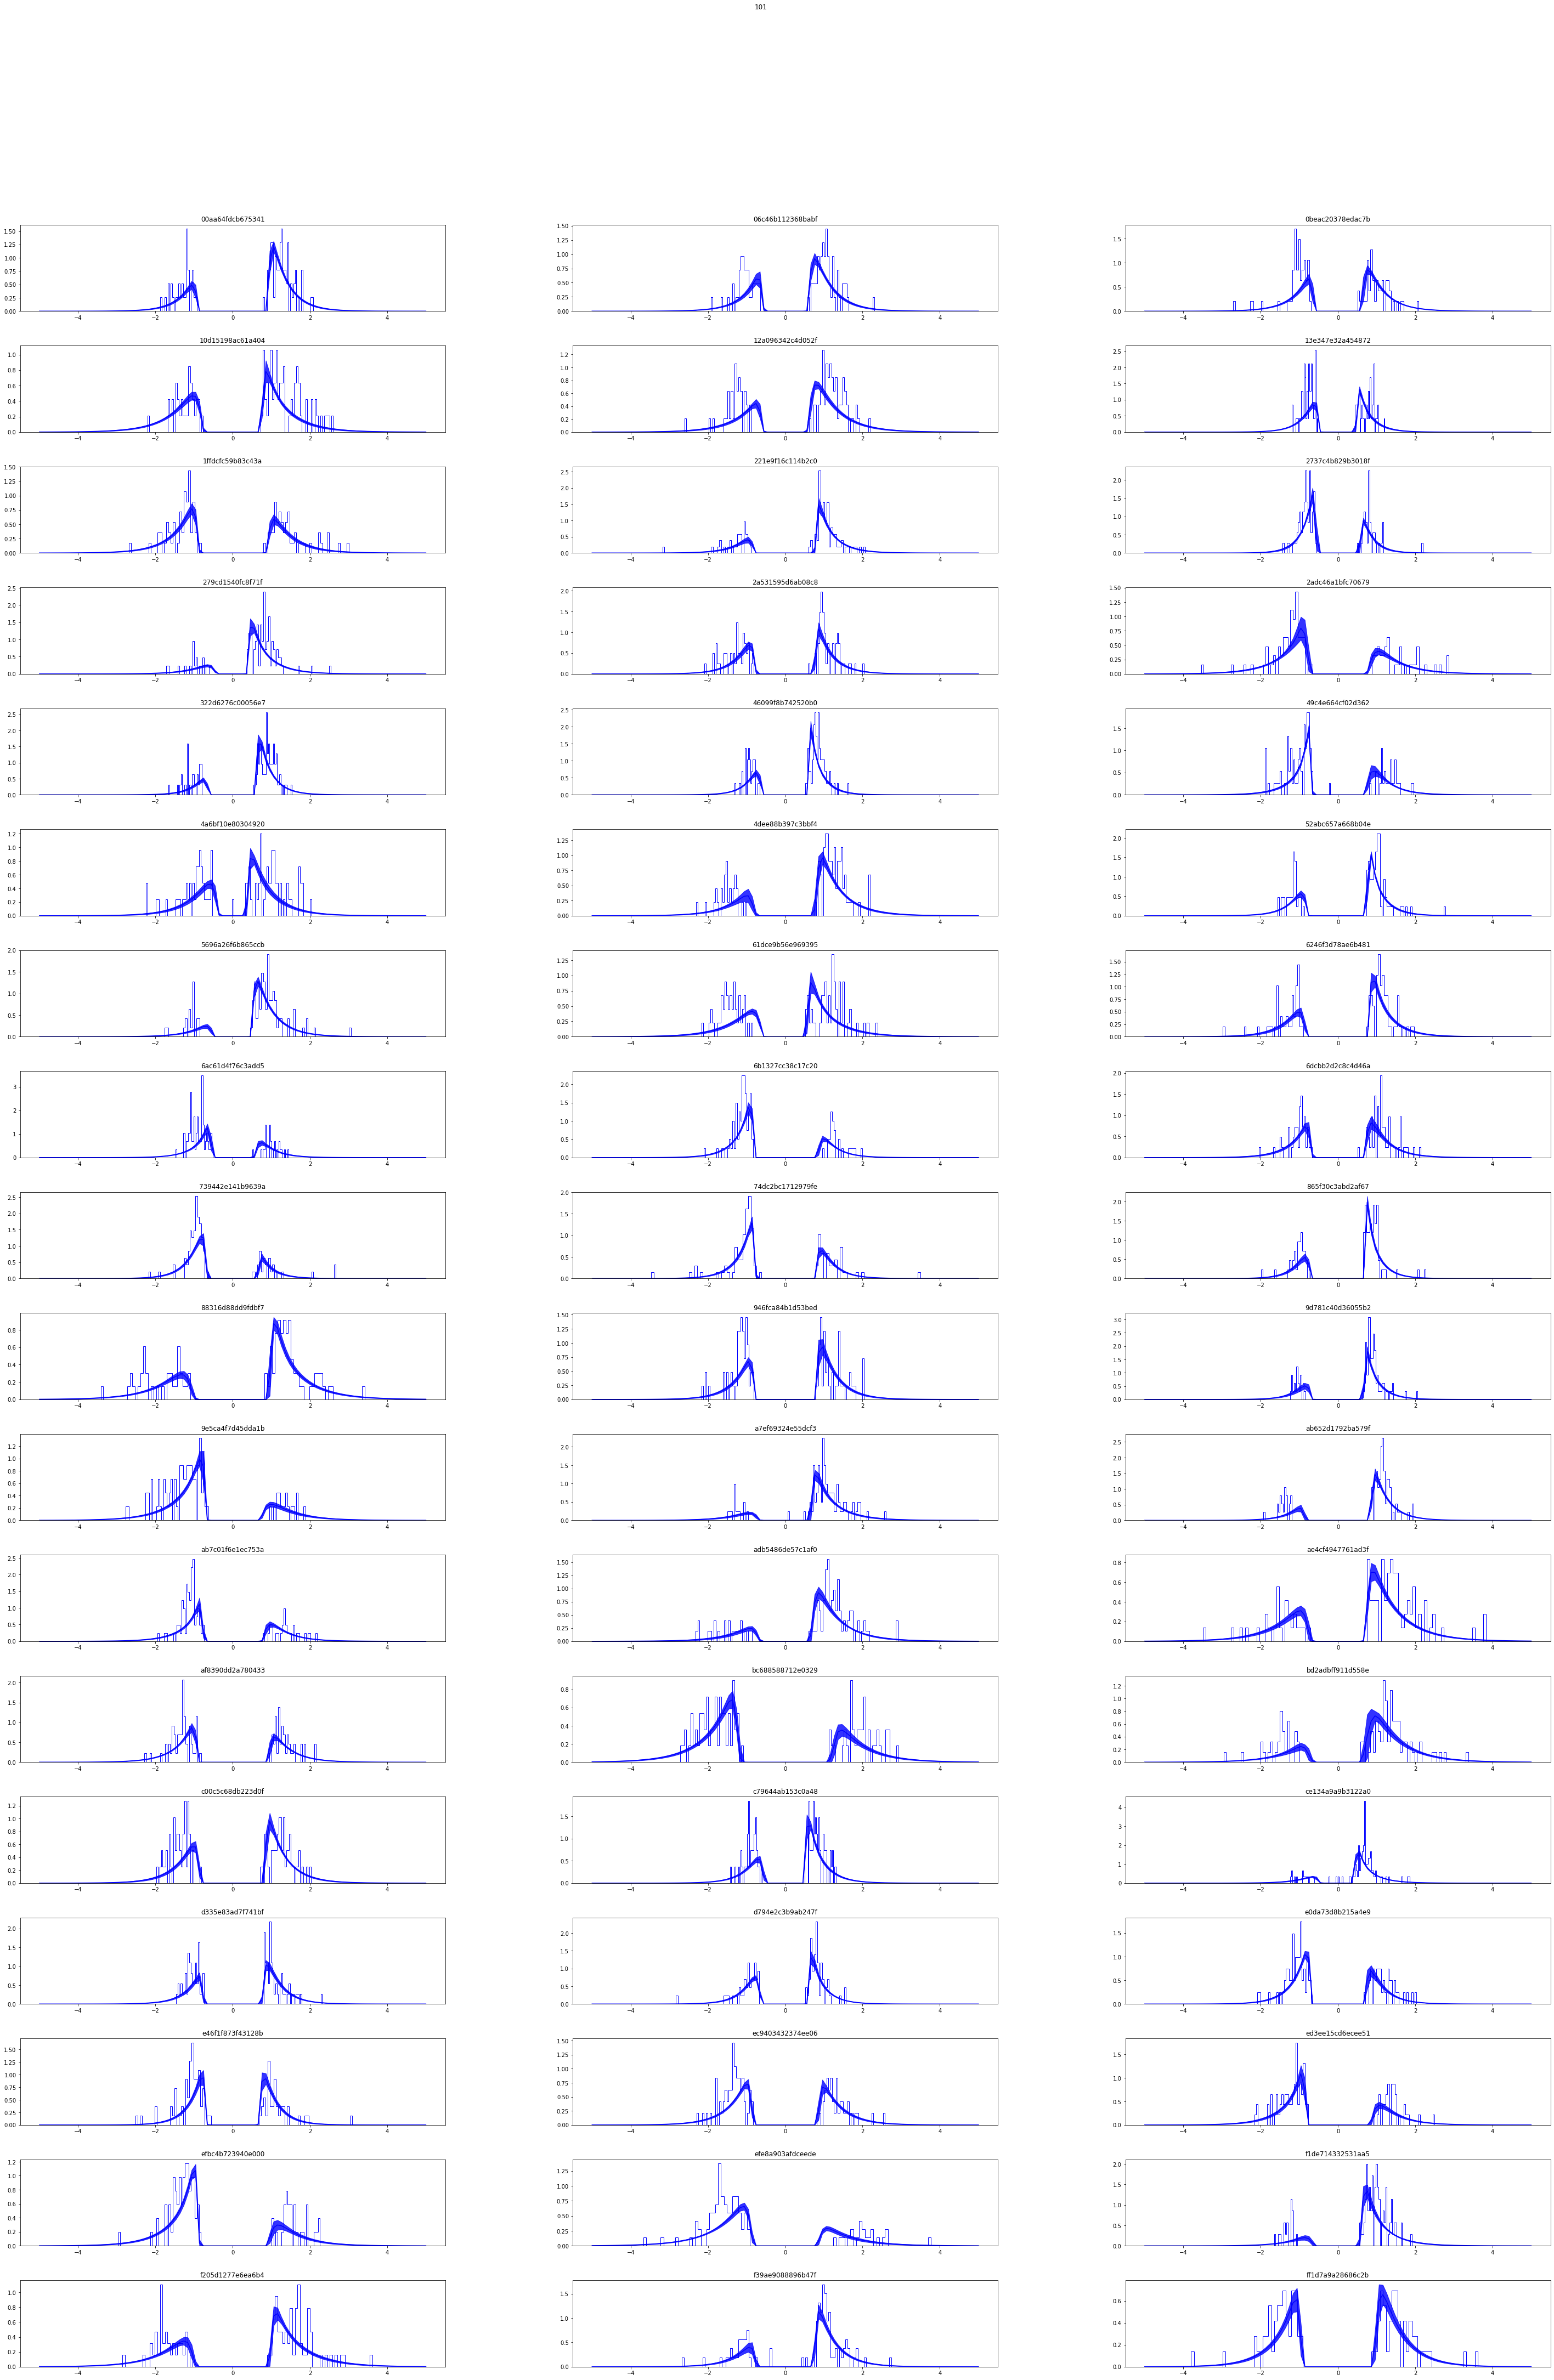

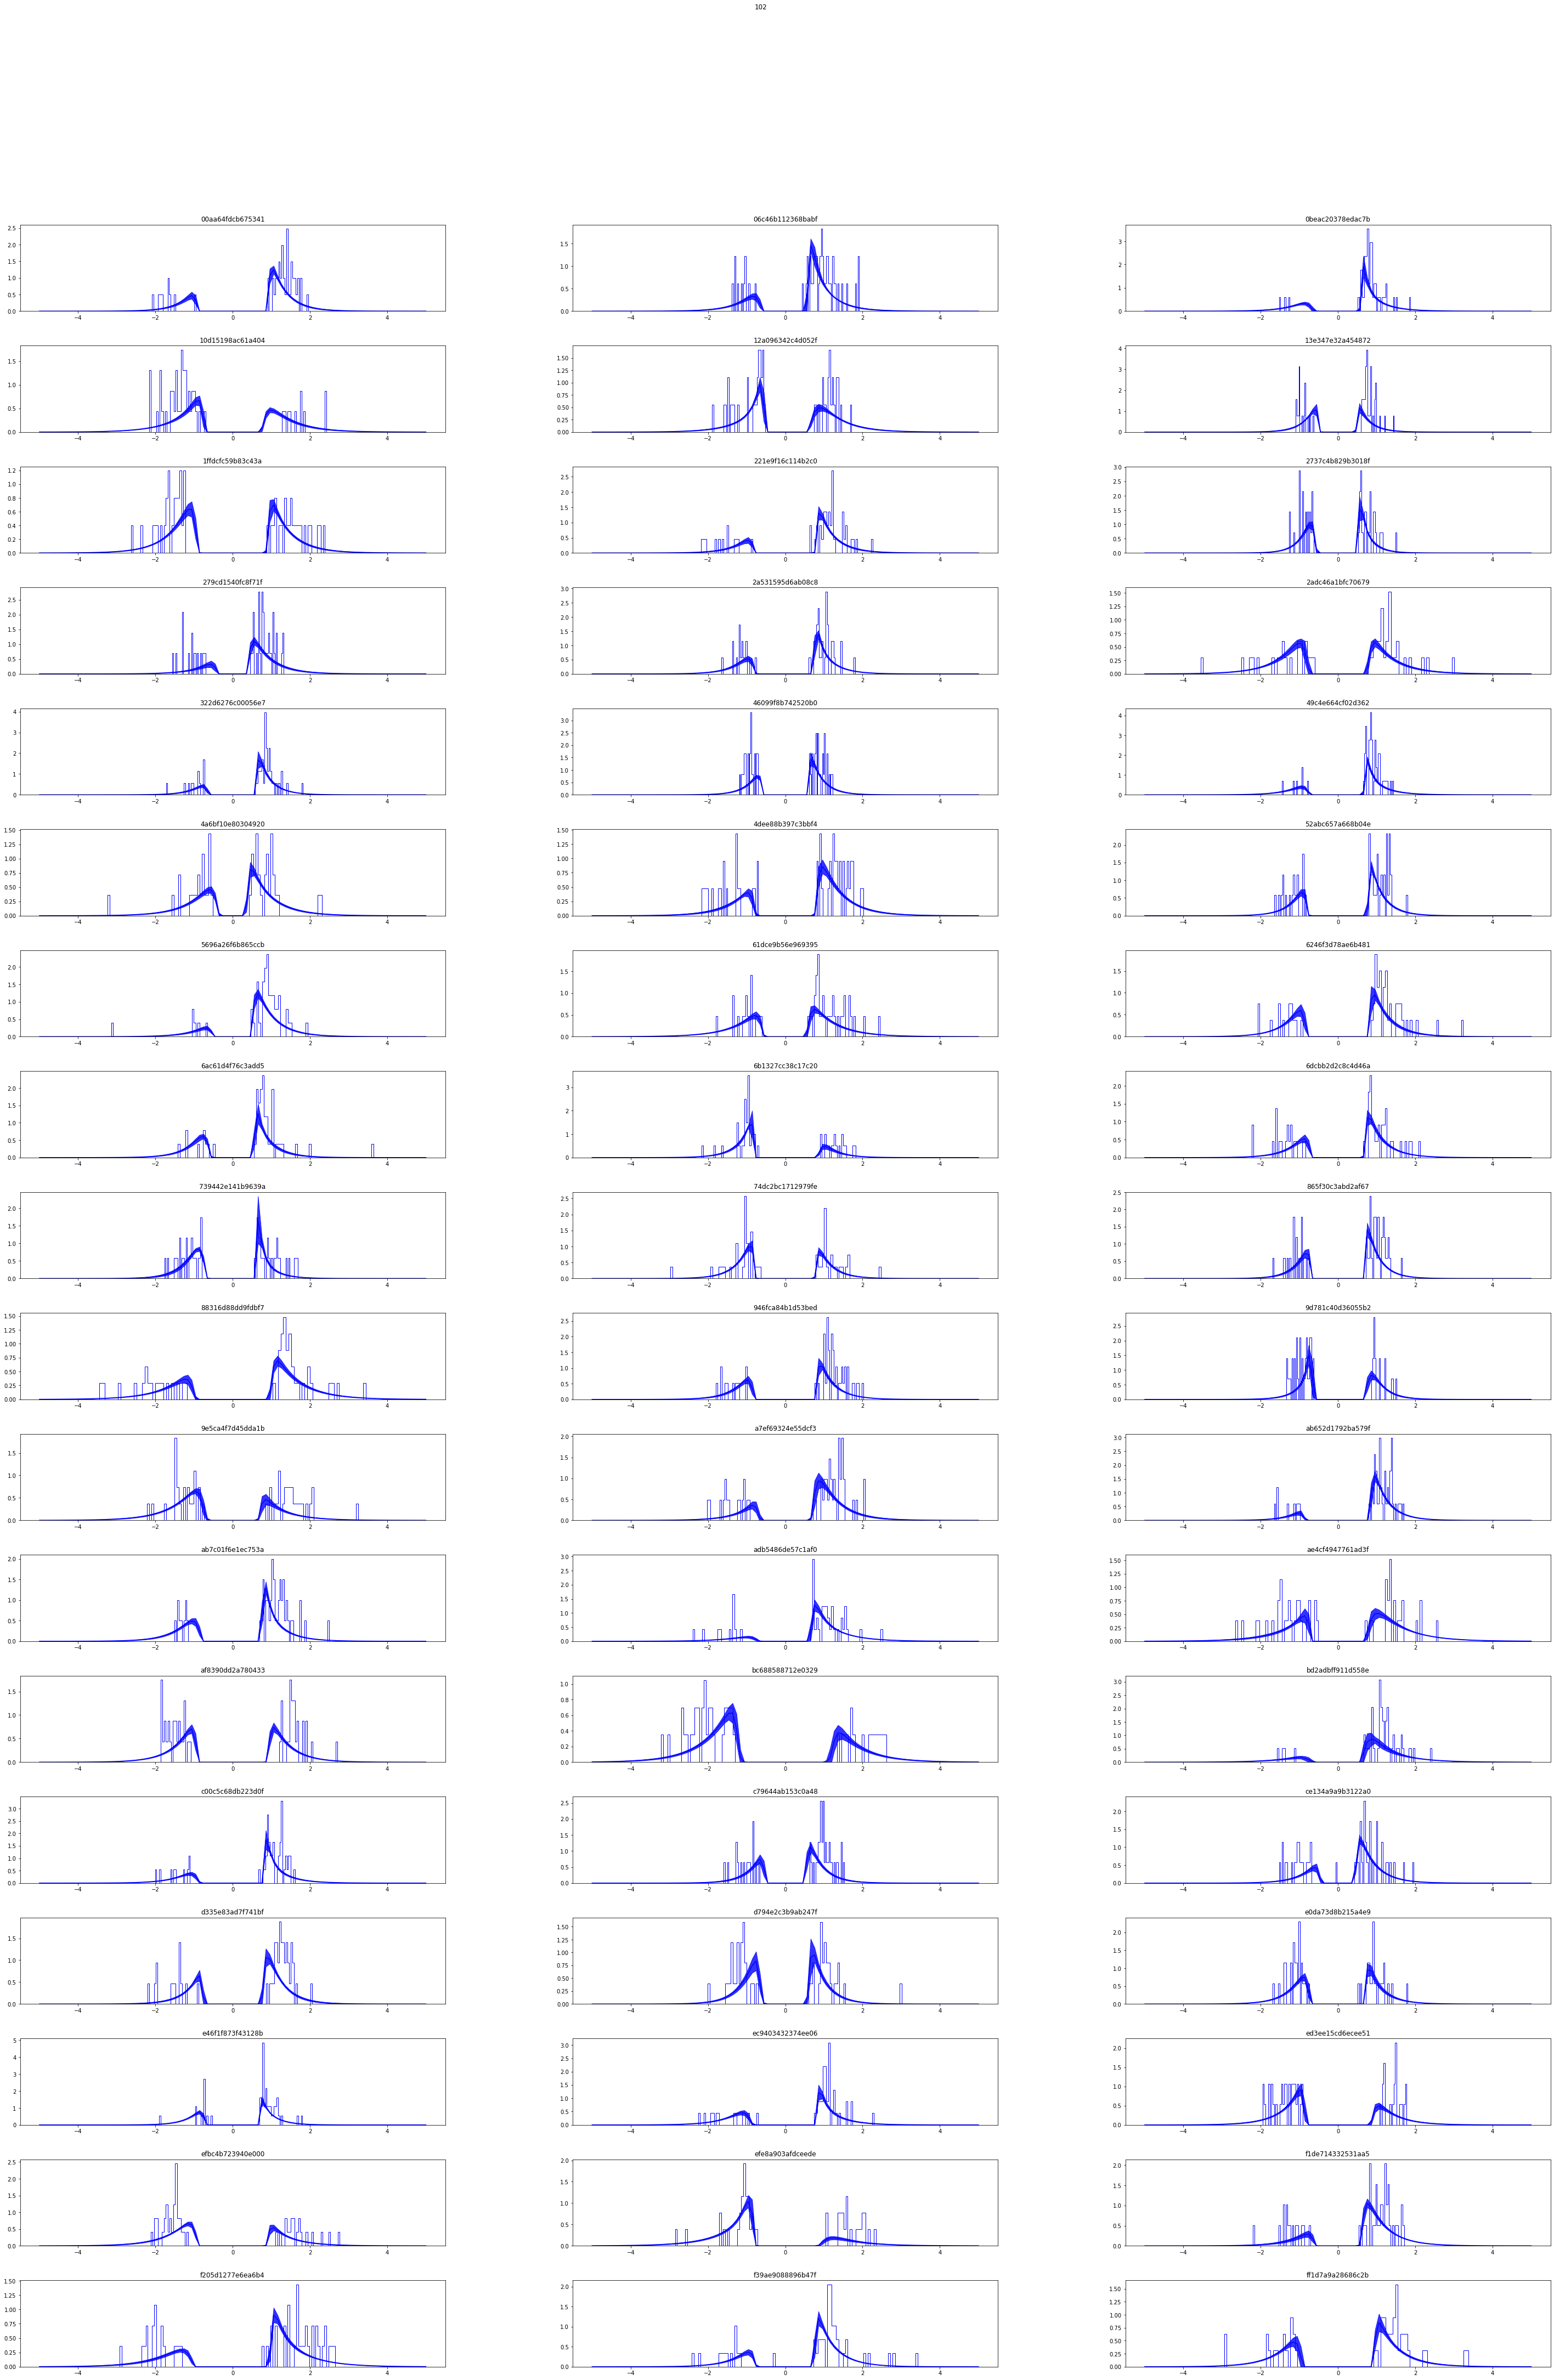

In [16]:
m.plot_posterior_predictive(figsize=(50, 70))